In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# Chargement des données

In [ ]:
!ls "/content/drive/MyDrive/"

ls: cannot access '/content/drive/MyDrive/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_path = "/content/drive/MyDrive/dataset.csv"

In [ ]:
data = pd.read_csv(data_path)
french_sentences = data["Français"].tolist()
ling_sentences = data["Lingala"].tolist()

In [ ]:
data.head()

,Français,Lingala
0,"Au commencement, Dieu créa les cieux et la terre.","Na ebandeli, Nzambe akelaki Likolo mpe mokili."
1,"Or la terre était informe et vide, et les ténè...",Mokili ezalaki na lolenge te mpe ezalaki pamba...
2,Et Dieu dit: Que la lumière soit; et la lumièr...,Mpe Nzambe alobaki : « Tika ete pole ezala ! »...
3,Et Dieu vit que la lumière était bonne; et Die...,"Nzambe amonaki ete pole ezali malamu, akabolak..."
4,"Et Dieu nomma la lumière, jour; et il nomma le...","Nzambe abengaki pole « moyi, » mpe abengaki mo..."


In [ ]:
data.Français

0        Au commencement, Dieu créa les cieux et la terre.
1        Or la terre était informe et vide, et les ténè...
2        Et Dieu dit: Que la lumière soit; et la lumièr...
3        Et Dieu vit que la lumière était bonne; et Die...
4        Et Dieu nomma la lumière, jour; et il nomma le...
                               ...                        
41894                                                  NaN
41895                                                  NaN
41896                                                  NaN
41897                                                  NaN
41898                                                  NaN
Name: Français, Length: 41899, dtype: object

In [ ]:
data.Lingala

0           Na ebandeli, Nzambe akelaki Likolo mpe mokili.
1        Mokili ezalaki na lolenge te mpe ezalaki pamba...
2        Mpe Nzambe alobaki : « Tika ete pole ezala ! »...
3        Nzambe amonaki ete pole ezali malamu, akabolak...
4        Nzambe abengaki pole « moyi, » mpe abengaki mo...
                               ...                        
41894                                                  NaN
41895                                                  NaN
41896                                                  NaN
41897                                                  NaN
41898                                                  NaN
Name: Lingala, Length: 41899, dtype: object

In [ ]:
import re

In [ ]:
corpus_fr = []
for french_sentence in french_sentences:
  french_sentence = str(french_sentence).split('nan')[0]
  french_sentence = french_sentence.lower()
  french_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', french_sentence)  # Supprime les caractères spéciaux
  french_sentence = re.sub(r'\s+', ' ', french_sentence)  # Supprime les espaces multiples
  french_sentence = french_sentence.strip()  # Supprime les espaces en début et fin de phrase
  if french_sentence:
    corpus_fr.append(french_sentence)

In [ ]:
len(corpus_fr), corpus_fr[:10]

(31098,
 ['au commencement dieu cra les cieux et la terre',
  'or la terre tait informe et vide et les tnbres taient la surface de labme et lesprit de dieu se mouvait sur les eaux',
  'et dieu dit que la lumire soit et la lumire fut',
  'et dieu vit que la lumire tait bonne et dieu spara la lumire davec les tnbres',
  'et dieu nomma la lumire jour et il nomma les tnbres nuit et il y eut un soir et il y eut un matin ce fut le premier jour',
  'puis dieu dit quil y ait une tendue entre les eaux et quelle spare les eaux davec les eaux',
  'et dieu fit ltendue et spara les eaux qui sont audessous de ltendue davec les eaux qui sont audessus de ltendue et cela fut ainsi',
  'et dieu nomma ltendue cieux et il y eut un soir et il y eut un matin ce fut le second jour',
  'puis dieu dit que les eaux qui sont audessous des cieux se rassemblent en un seul lieu et que le sec paraisse et cela fut ainsi',
  'et dieu nomma le sec terre et il nomma lamas des eaux mers et dieu vit que cela tait bon'])

In [ ]:
data['Français'].describe()

count                                          31098
unique                                         30825
top       L'Éternel parla encore à Moïse, en disant:
freq                                              22
Name: Français, dtype: object

In [ ]:
# corpus_ln = []
# for ln_sentence in ling_sentences:
#   ln_sentence = str(ln_sentence).split('nan')[0]
#   ln_sentence = ln_sentence.lower()
#   if ln_sentence:
#     corpus_ln.append(ln_sentence)

In [ ]:
import re

corpus_ln = []
for ln_sentence in ling_sentences:
  ln_sentence = str(ln_sentence).split('nan')[0] # supprimer les caractères vides
  ln_sentence = ln_sentence.lower() #mettre les caractères en miniscule
  ln_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', ln_sentence)  # Supprime les caractères spéciaux
  ln_sentence = re.sub(r'\s+', ' ', ln_sentence)  # Supprime les espaces multiples
  ln_sentence = ln_sentence.strip()  # Supprime les espaces en début et fin de phrase
  if ln_sentence:
    corpus_ln.append(ln_sentence)

In [ ]:
len(corpus_ln), corpus_ln[0]
corpus_ln = corpus_ln[:31098]
len(corpus_ln)

31098

In [ ]:
len(corpus_ln), corpus_ln[:10]

(31098,
 ['na ebandeli nzambe akelaki likolo mpe mokili',
  'mokili ezalaki na lolenge te mpe ezalaki pamba molili ezalaki na likolo ya mozindo mpe molimo ya nzambe azalaki kopepa na likolo ya mayi',
  'mpe nzambe alobaki tika ete pole ezala mpe pole ezalaki',
  'nzambe amonaki ete pole ezali malamu akabolaki pole na molili',
  'nzambe abengaki pole moyi mpe abengaki molili butu pokwa ezalaki mpe tongo ezalaki yango ezalaki mokolo moko',
  'bongo nzambe alobaki tika ete etando ezala kati na mayi mpo na kokabola yango',
  'nzambe akelaki etando akabolaki mayi oyo ezalaki na se ya etando na mayi ya likolo yango esalemaki mpe bongo',
  'nzambe abengaki etando likolo pokwa ezalaki tongo mpe ezalaki yango ezalaki mokolo ya mibale',
  'bongo nzambe alobaki tika ete mayi oyo ezali na se ya likolo esangana esika moko mpo ete mabele ya kokawuka ebima yango esalemaki mpe bongo',
  'nzambe abengaki mabele ya kokawuka mokili mpe abengaki mayi oyo esanganaki esika moko ebale monene nzambe amonaki e

# Tokenization

In [ ]:
# Adaptation des tokenizers aux données
tokenizer_french = Tokenizer()
tokenizer_french.fit_on_texts(corpus_fr)
fre_seq = tokenizer_french.texts_to_sequences(corpus_fr)

In [ ]:
tokenizer_ln = Tokenizer()
tokenizer_ln.fit_on_texts(corpus_ln)
ln_seq = tokenizer_ln.texts_to_sequences(corpus_ln)

In [ ]:
# Utilisation du nombre de mots dans le tokenizer pour définir l'embedding
vocab_size_fr = len(tokenizer_french.word_index) + 1
vocab_size_ln = len(tokenizer_ln.word_index) + 1


In [ ]:
# vocab_size_fr = 12000
# vocab_size_ln = 12000

In [ ]:
vocab_size_fr, vocab_size_ln

(24212, 14065)

In [ ]:
# Padding
max_length = max(len(seq) for seq in fre_seq + ln_seq)

In [ ]:
max_length

98

In [ ]:
fr_seq_padded = pad_sequences(fre_seq, maxlen=max_length, padding='post')
ln_seq_padded = pad_sequences(ln_seq, maxlen=max_length, padding='post')

In [ ]:
ln_seq_padded, len(ln_seq_padded)

(array([[   1,  536,   20, ...,    0,    0,    0],
        [  40,   43,    1, ...,    0,    0,    0],
        [   3,   20,   33, ...,    0,    0,    0],
        ...,
        [  37, 8540,    1, ...,    0,    0,    0],
        [  37,  387,  648, ...,    0,    0,    0],
        [  83,    1,    5, ...,    0,    0,    0]], dtype=int32),
 31098)

In [ ]:
tokenizer_ln, tokenizer_french

(<keras.src.preprocessing.text.Tokenizer at 0x7c5cba7e5ff0>,
 <keras.src.preprocessing.text.Tokenizer at 0x7c5cba7e6860>)

In [ ]:
embedding_dim = 256
units = 512

In [ ]:
# !pip install git+https://github.com/locuslab/quaternionic-rnn.git
# from quaternionic import QRNN

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_length,))
enc_emb = Embedding(input_dim=vocab_size_fr, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(units, return_state=True)
encoder_lstm = LSTM(units, return_state=True)
# encoder_qrnn = LSTM(enc_emb.weight.size(1), n_hid, n_layers=n_layers, dropout=p_enc, bidirectional=True)
# out_enc = Linear(2*n_hid, enc_emb.weight.size(1), bias=False)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

In [ ]:
# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(input_dim=vocab_size_fr, output_dim=embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
# decoder_qrnn = QRNN(emb_sz + 2*n_hid, emb_dec.weight.size(1), n_layers=n_layers, dropout=p_dec)/
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_ln, activation='softmax')
decoder_dense = Dense(vocab_size_ln, activation='relu')
decoder_dense = Dense(vocab_size_ln, activation='sigmoid')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# model = Seq2SeqQRNN([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
np.power(vocab_size_fr, 1/4)

12.474055336644913

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 98)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 98, 256)              6198272   ['input_5[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, None, 256)            6198272   ['input_6[0][0]']             
                                                                                              

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(fr_seq_padded, ln_seq_padded, test_size=0.5, shuffle=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(fr_seq_padded.shape)
print(ln_seq_padded.shape)

(31098, 98)
(31098, 98)


In [ ]:
# Ensure both arrays have the same number of samples
fr_seq_padded = fr_seq_padded[:ln_seq_padded.shape[0]]

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(fr_seq_padded, ln_seq_padded, test_size=0.2, shuffle=True)

In [ ]:
h = model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val), epochs=30, batch_size=1024)

Epoch 1/30
16/16 [==============================] - 89s 5s/step - loss: 5.1158 - accuracy: 0.7049 - val_loss: 2.0209 - val_accuracy: 0.7529
Epoch 2/30
16/16 [==============================] - 63s 4s/step - loss: 3.7621 - accuracy: 0.6052 - val_loss: 4.5221 - val_accuracy: 0.5730
Epoch 3/30
16/16 [==============================] - 81s 5s/step - loss: 1.8754 - accuracy: 0.7425 - val_loss: 1.6761 - val_accuracy: 0.7533
Epoch 4/30
16/16 [==============================] - 63s 4s/step - loss: 1.6480 - accuracy: 0.7599 - val_loss: 1.6596 - val_accuracy: 0.7614
Epoch 5/30
16/16 [==============================] - 63s 4s/step - loss: 1.6381 - accuracy: 0.7635 - val_loss: 1.6559 - val_accuracy: 0.7619
Epoch 6/30
16/16 [==============================] - 82s 5s/step - loss: 1.6324 - accuracy: 0.7635 - val_loss: 1.6529 - val_accuracy: 0.7620
Epoch 7/30
16/16 [==============================] - 82s 5s/step - loss: 1.6283 - accuracy: 0.7636 - val_loss: 1.6512 - val_accuracy: 0.7620
Epoch 8/30
16/16 [==

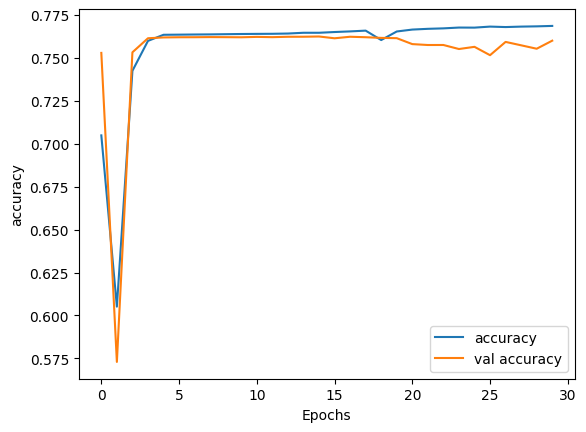

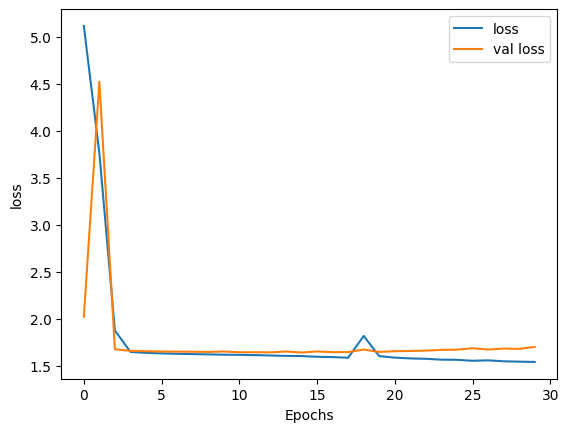

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val '+string])
    plt.show()

plot_graphs(h, 'accuracy')
plot_graphs(h, 'loss')

# Conversion de son en text

## Utilisation de whisper

In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# importe whisper

In [ ]:
!pip install git+https://github.com/openai/whisper.git

In [ ]:
import whisper

# Base Model

In [ ]:
# !pip uninstall -y torch torchvision torchaudio
# following command was generated using https://pytorch.org/get-started/locally/#with-cuda-1
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
%%time

model_whisper = whisper.load_model('base')

out = model_whisper.transcribe('/content/videoplayback (1).weba')
out['text']

# Medium model

In [ ]:
%%time
model_whisper = whisper.load_model('medium')
out = model_whisper.transcribe('/content/videoplayback (1).weba')
out['text']

In [ ]:
# input_sentence = out['text']
input_sentence = 'au commencement etait la parole'

In [ ]:
input_sentence

'au commencement etait la parole'

In [ ]:
X_train.shape

(15549, 98)

In [ ]:
prompt = "dieu est amour"

In [ ]:
prompt_seq = tokenizer_french.texts_to_sequences([prompt])
prompt_seq[0]

[26, 22, 2156]

In [ ]:
prompt_x = pad_sequences([prompt_seq[0]], maxlen=max_length, padding='pre')

In [ ]:
prompt_x.shape

(1, 98)

In [ ]:
prompt_x

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   26,   22, 2156]],
      dtype=int32)

In [ ]:
pred = model.predict([prompt_x, np.zeros((1, max_length))])

1/1 [==============================] - 1s 1s/step


In [ ]:
pred

array([[[9.5269400e-01, 9.9876922e-01, 9.9570870e-01, ...,
         2.6216337e-02, 5.0340691e-03, 2.6064932e-03],
        [9.8015171e-01, 9.9929953e-01, 9.9854600e-01, ...,
         1.6432138e-02, 2.2907332e-03, 1.1013058e-03],
        [9.8818123e-01, 9.9904877e-01, 9.9824774e-01, ...,
         1.3571645e-02, 1.8335747e-03, 8.7897287e-04],
        ...,
        [9.9999249e-01, 9.5338523e-01, 9.4035691e-01, ...,
         2.4329107e-03, 4.0317397e-04, 3.1531844e-04],
        [9.9999249e-01, 9.5335662e-01, 9.4021755e-01, ...,
         2.4335715e-03, 4.0383462e-04, 3.1596544e-04],
        [9.9999249e-01, 9.5322061e-01, 9.3949765e-01, ...,
         2.4367513e-03, 4.0720979e-04, 3.1933753e-04]]], dtype=float32)

In [ ]:
np.argmax(pred)

998615

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
# tokenizer.index_word.get(1153330)

In [ ]:
# output_sentence = tokenizer_ln.sequences_to_texts(output_sequence)[0]

# Afficher la traduction
pred = np.argmax(pred, axis=-1)
pred = tokenizer_ln.sequences_to_texts(pred)[0]
print("Traduction : ", pred)

Traduction :  na na na na na na na na


In [ ]:
import string

# Définition de la fonction preprocess_sentence
def preprocess_sentence(sentence):
    # Conversion en minuscules
    sentence = sentence.lower()

    # Suppression de la ponctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    return sentence

# Supposons que vous avez une phrase en français que vous souhaitez traduire en anglais
input_sentence = "en disant:"

# Prétraitement de la phrase d'entrée
input_sentence = preprocess_sentence(input_sentence)

# Convertir la phrase en une séquence d'entiers en utilisant le tokenizer français
input_sequence = tokenizer_french.texts_to_sequences([input_sentence])

# Remplir la séquence pour avoir la même longueur que les autres séquences d'entrée
input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')

# Traduction en utilisant le modèle
output_sequence = model.predict([input_sequence, np.zeros((1, max_length))])
output_sequence = np.argmax(output_sequence, axis=-1)

# Convertir la séquence de sortie en une phrase en anglais en utilisant le tokenizer anglais
output_sentence = tokenizer_ln.sequences_to_texts(output_sequence)[0]

# Afficher la traduction
print("Traduction : ", output_sentence)

1/1 [==============================] - 0s 51ms/step
Traduction :  na na na na na na na na
